# Importing needed libraries

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [25]:
data = pd.read_csv("books.csv")
data

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,9925,86737,86737,3877968,52,1582349177,9.781582e+12,Mary Hoffman,2002.0,City of Masks,...,12048,13385,555,314,758,3154,4872,4287,https://images.gr-assets.com/books/1294870497m...,https://images.gr-assets.com/books/1294870497s...
1350,9937,13010211,13010211,18171867,22,1596435712,9.781596e+12,Caragh M. O'Brien,2012.0,Promised,...,11766,12884,1260,256,1098,3565,4392,3573,https://images.gr-assets.com/books/1330546217m...,https://images.gr-assets.com/books/1330546217s...
1351,9942,16074758,16074758,21869436,18,1442486597,9.781442e+12,"Abigail Haas, Abby McDonald",2013.0,Dangerous Girls,...,10439,12970,2631,203,553,2029,4567,5618,https://images.gr-assets.com/books/1356513050m...,https://images.gr-assets.com/books/1356513050s...
1352,9947,21393526,21393526,40690062,19,62320521,9.780062e+12,Maria Dahvana Headley,2015.0,Magonia,...,12510,13652,2910,577,1440,3881,4772,2982,https://images.gr-assets.com/books/1413479866m...,https://images.gr-assets.com/books/1413479866s...


# Handling the data

Get info of the data to know if there is null needs to be removed

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1354 non-null   int64  
 1   goodreads_book_id          1354 non-null   int64  
 2   best_book_id               1354 non-null   int64  
 3   work_id                    1354 non-null   int64  
 4   books_count                1354 non-null   int64  
 5   isbn                       1302 non-null   object 
 6   isbn13                     1310 non-null   float64
 7   authors                    1354 non-null   object 
 8   original_publication_year  1351 non-null   float64
 9   original_title             1302 non-null   object 
 10  title                      1354 non-null   object 
 11  language_code              1245 non-null   object 
 12  average_rating             1354 non-null   float64
 13  ratings_count              1354 non-null   int64

In [27]:
# find missing values to drop them
data.isnull().sum()

book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                        44
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64

In [28]:
# drop the unuseful columns
data.drop(['isbn', 'isbn13','language_code'], axis=1, inplace=True)

In [29]:
# replace the missing values of this column using the median
median_year = data['original_publication_year'].median()
data['original_publication_year'].fillna(median_year, inplace=True)

In [30]:
# drop rows with missing original_title
data.dropna(subset=['original_title'], inplace=True)

In [31]:
# see the changes
data.isnull().sum()

book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
authors                      0
original_publication_year    0
original_title               0
title                        0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64

In [32]:
# Convert 'original_publication_year' to int
data['original_publication_year'] = data['original_publication_year'].astype('Int64')


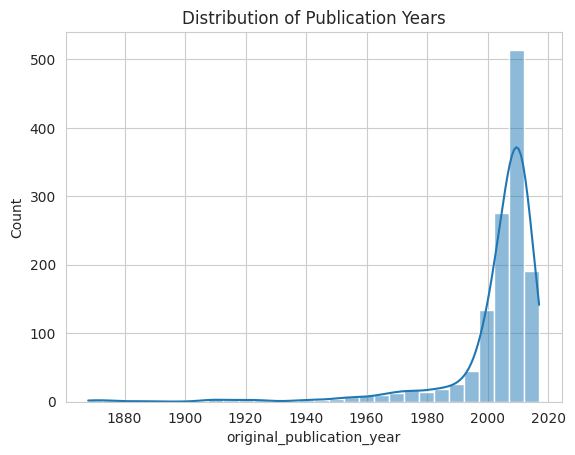

In [33]:
# Visualization
sns.histplot(data['original_publication_year'], bins=30, kde=True)
plt.title('Distribution of Publication Years')
plt.show()


In [34]:
# Filter the dataset to include only the Harry Potter books
harry_potter_data = data[data['original_title'].str.contains('Harry Potter', case=False)]



<ipython-input-35-c51056e8f2d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='original_publication_year', data=harry_potter_data, palette='viridis')


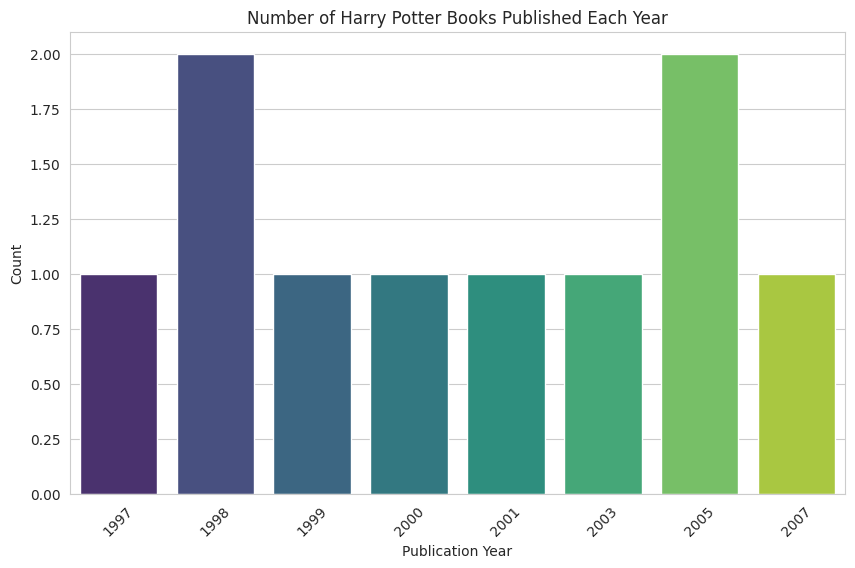

In [35]:
 # Countplot of the number of books published each year
plt.figure(figsize=(10, 6))
sns.countplot(x='original_publication_year', data=harry_potter_data, palette='viridis')
plt.title('Number of Harry Potter Books Published Each Year')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Find the most selling books within the Harry Potter series
most_selling = harry_potter_data.sort_values(by='ratings_count', ascending=False).head(5)

print("Most Selling Books within the Harry Potter Series:")
print(most_selling[['original_title', 'ratings_count']])


Most Selling Books within the Harry Potter Series:
                              original_title  ratings_count
1   Harry Potter and the Philosopher's Stone        4602479
6   Harry Potter and the Prisoner of Azkaban        1832823
9    Harry Potter and the Chamber of Secrets        1779331
10       Harry Potter and the Goblet of Fire        1753043
11      Harry Potter and the Deathly Hallows        1746574


<ipython-input-37-c48240b2accf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='original_title', y='ratings_count', data=most_selling, palette='muted')


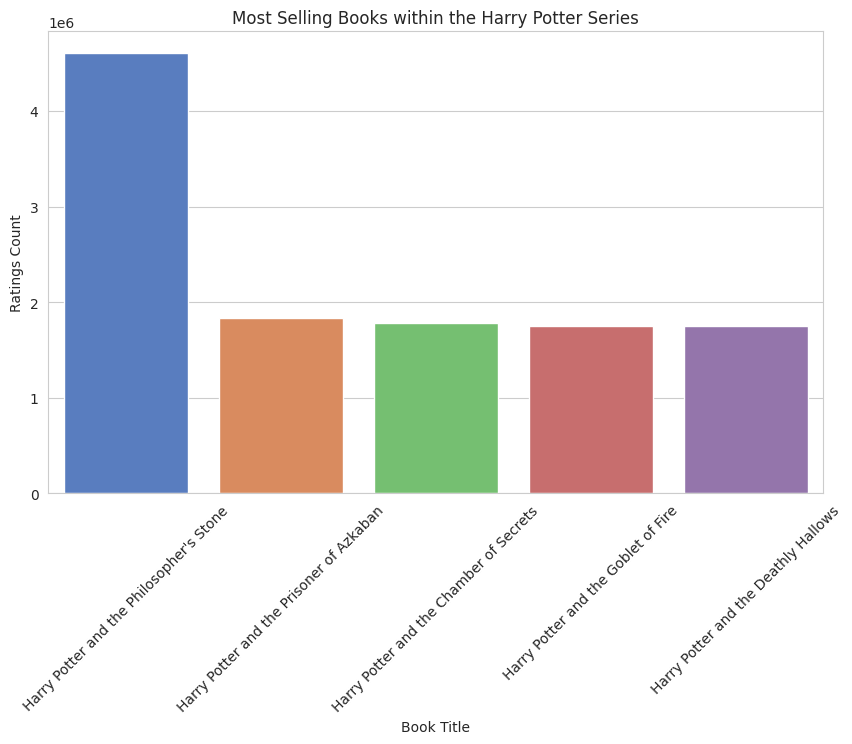

In [37]:
# Visualize most selling books within the Harry Potter series
plt.figure(figsize=(10, 6))
sns.barplot(x='original_title', y='ratings_count', data=most_selling, palette='muted')
plt.title('Most Selling Books within the Harry Potter Series')
plt.xlabel('Book Title')
plt.ylabel('Ratings Count')
plt.xticks(rotation=45)
plt.show()


In [38]:
weighted_avg = (harry_potter_data.average_rating * harry_potter_data.ratings_count).sum() / harry_potter_data.ratings_count.sum()
print("\nAverage Rating of the Harry Potter Books:", weighted_avg)



Average Rating of the Harry Potter Books: 4.489176670023024


<ipython-input-39-059e5d8bae12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titles, y=harry_potter_data.average_rating, palette="viridis")


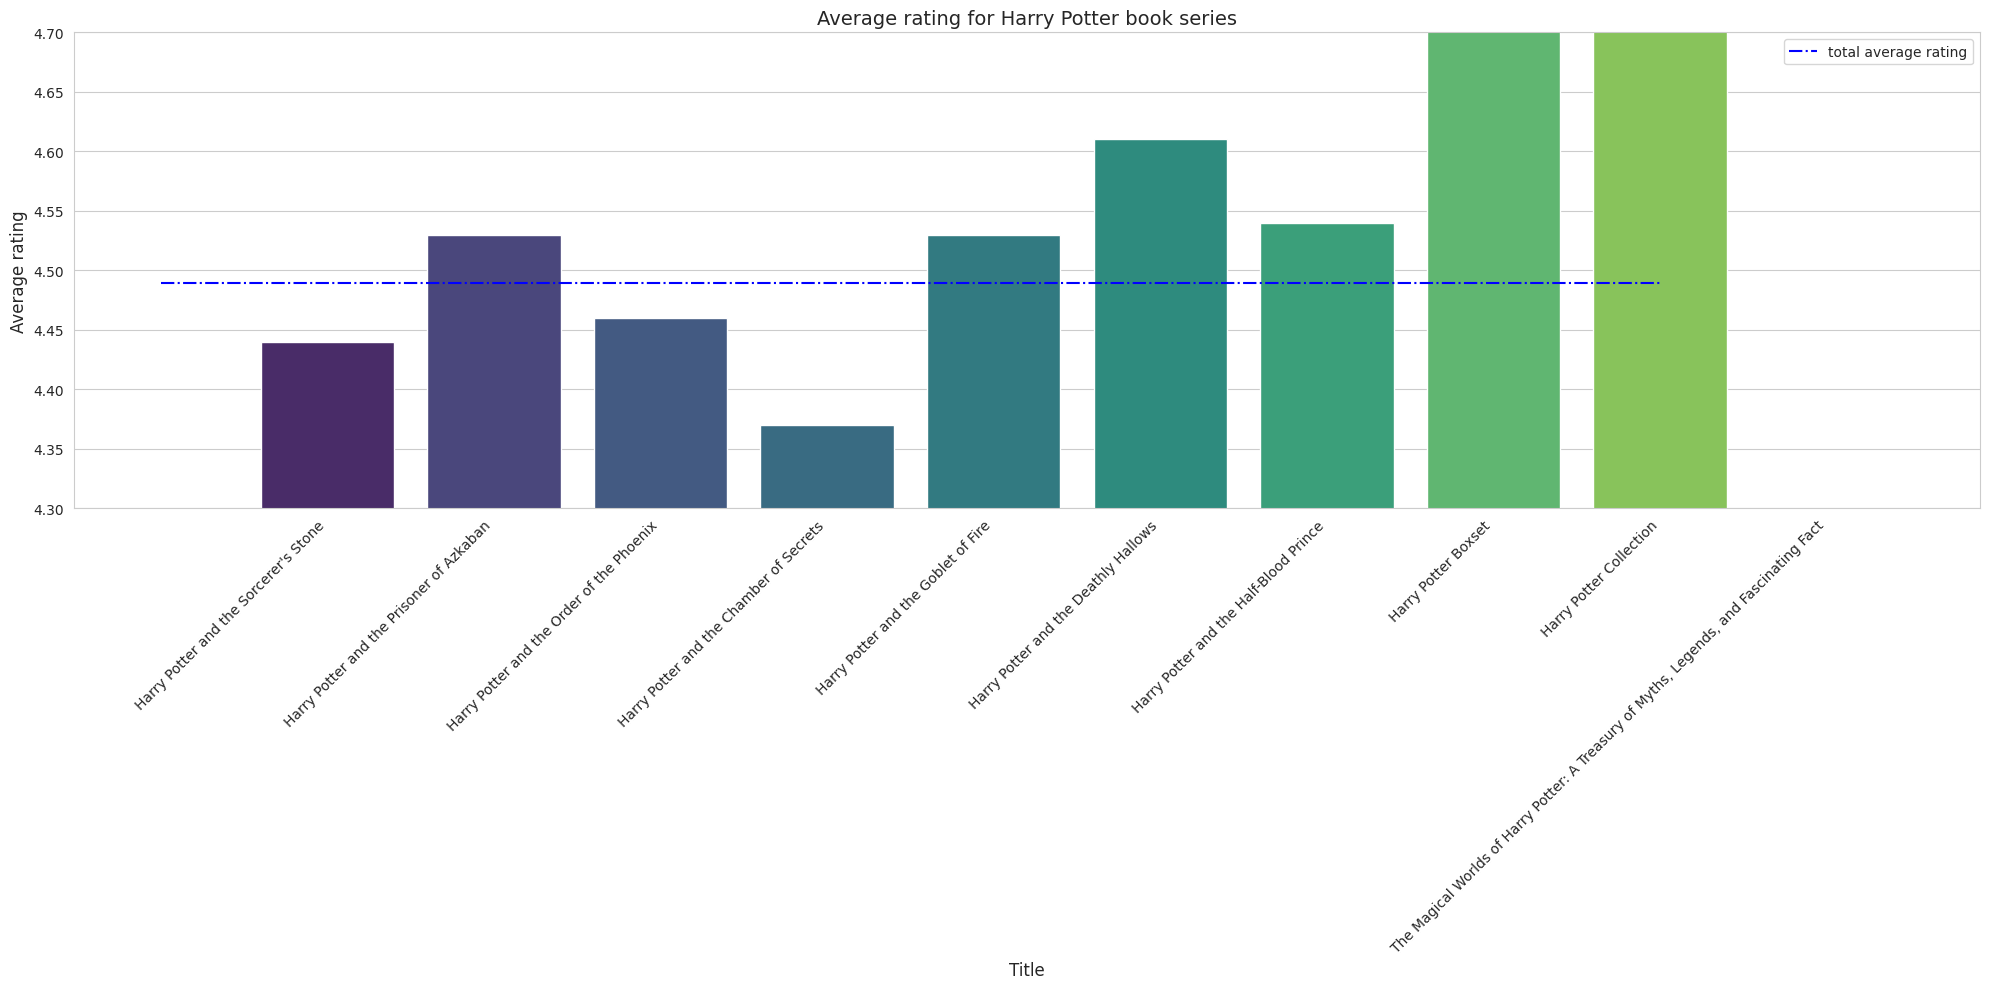

In [39]:
titles = harry_potter_data.title.tolist()
titles = [title[:title.find(' (')] for title in titles]

sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
sns.barplot(x=titles, y=harry_potter_data.average_rating, palette="viridis")
plt.xlabel('Title', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.ylim((4.3, 4.7))
plt.hlines(weighted_avg, xmin=-1, xmax=8, color='blue', linestyles='dashdot', label='total average rating')
plt.title('Average rating for Harry Potter book series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()